In [1]:
import pandas as pd

In [5]:
#Load file csv kedalam df_sales
df_sales = pd.read_csv('Sales Transaction v.4a.csv')

In [7]:
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


# Data Cleansing
Eksekusi 2 code dibawah ini

In [9]:
#Melihat type data setiap kolom
df_sales.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [11]:
# 1. Ubah kolom Date menjadi tipe datetime
df_sales['Date']= pd.to_datetime(df_sales['Date'])

# 2. Buang semua transaksi yang memiliki quantity negative atau yang TransactionNo diawali dengan C
df_sales = df_sales[df_sales['TransactionNo'].str[0]!='C']

In [13]:
#mencari top contributing products
import pandas as pd

# Load data (you can replace this with the correct file path)
# df = pd.read_csv('your_file.csv')

# Sample DataFrame based on your image

df_con = df_sales.copy()

# Step 1: Calculate total revenue
df_con['TotalRevenue'] = df_con['Price'] * df_con['Quantity']

# Step 2: Rank products by volume (Quantity) and total revenue
df_con['VolumeRank'] = df_con['Quantity'].rank(ascending=False, pct=True)
df_con['RevenueRank'] = df_con['TotalRevenue'].rank(ascending=False, pct=True)

# Step 3: Apply segmentation rules
def categorize(rank):
    if rank <= 0.2:
        return 'Popular'
    elif rank <= 0.8:
        return 'Normal'
    else:
        return 'Low'

df_con['VolumeSegment'] = df_con['VolumeRank'].apply(categorize)
df_con['RevenueSegment'] = df_con['RevenueRank'].apply(categorize)

# Step 4: Determine final segmentation
def final_segment(row):
    if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
        return 'Super Popular'
    elif 'Popular' in (row['VolumeSegment'], row['RevenueSegment']) and 'Normal' in (row['VolumeSegment'], row['RevenueSegment']):
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

df_con['FinalSegment'] = df_con.apply(final_segment, axis=1)

# Output the final DataFrame with the segmentation
df_con[['ProductNo', 'ProductName', 'Quantity', 'TotalRevenue', 'FinalSegment']]

,ProductNo,ProductName,Quantity,TotalRevenue,FinalSegment
0,22485,Set Of 2 Wooden Market Crates,12,257.64,Super Popular
1,22596,Christmas Star Wish List Chalkboard,36,383.40,Super Popular
2,23235,Storage Tin Vintage Leaf,12,138.36,Super Popular
3,23272,Tree T-Light Holder Willie Winkie,12,127.80,Popular
4,23239,Set Of 4 Knick Knack Tins Poppies,6,71.64,Normal
...,...,...,...,...,...
536320,37449,Ceramic Cake Stand + Hanging Cakes,2,40.90,Normal
536321,22776,Sweetheart 3 Tier Cake Stand,1,20.45,Normal
536322,22622,Box Of Vintage Alphabet Blocks,2,40.90,Normal
536323,37449,Ceramic Cake Stand + Hanging Cakes,1,20.45,Normal


In [15]:
df_con

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalRevenue,VolumeRank,RevenueRank,VolumeSegment,RevenueSegment,FinalSegment
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,0.190893,0.090961,Popular,Popular,Super Popular
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,0.042533,0.044601,Popular,Popular,Super Popular
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,0.190893,0.191988,Popular,Popular,Super Popular
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,0.190893,0.238560,Popular,Normal,Popular
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,0.365384,0.363443,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90,0.645523,0.515238,Normal,Normal,Normal
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45,0.861303,0.718082,Low,Normal,Normal
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90,0.645523,0.515238,Normal,Normal,Normal
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45,0.861303,0.718082,Low,Normal,Normal


# Top Contributing products

Pada retail store, ada banyak jenis barang yang dijual.
Memahami karakteristik penjualan di setiap barang sangatlah penting.  
Barang-barang dengan minat tinggi dari customer menjadi kunci bisnis untuk meraih untung.
Barang-barang dengan minat rendah dari masyarakat akan menjadi beban dari usaha apabila bisnis menyetok terlalu banyak.

Salah satu metode segmentasi yang digunakan adalah menggunakan segmentasi berdasarkan :
- Volume transaksi : Berapa banyak transaksi yang melibatkan suatu produk (Tidak mempedulikan banyaknya barang dalam 1 transaksi)
- Revenue total : Berapa dolar revenue yang dihasilkan dari penjualan produk ini.

Buatlah segmentasi produk berdasarkan volume dan revenue total dengan aturan sebagai berikut :

1. total_revenue didefinisikan sebagai perkalian harga barang dengan banyaknya pembelian
2. 20% produk dengan volume transaksi transaksi tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
3. 20% produk dengan total revenue tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
4. Berdasarkan penggabungan segmentasi no.2 dan no.3, apabila suatu produk Popular dari segi volume transaksi dan total revenue, maka segmentasi final dari produk tersebut adalah "Super Popular". Apabila salah satu atribut populer sementara atribut lainnya normal, maka segmentasi finalnya adalah "Popular". Apabila kedua atributnya "Low", maka segmentasi finalnya adalah "Low". Semua kombinasi lain selain yang disebutkan masuk ke kategori "Normal"

## Pertanyaan
1. Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019?
2. Apakah barang yang populer di November 2019 sama dengan barang yang populer di 
3. Apakah barang yang masuk kategori super populer di november sama dengan barang super populer di July ?

In [17]:
#Berikut jawaban untuk pertanyaan
import pandas as pd

# Load the data file (assuming CSV format)
df_soal1 = df_con.copy()
# Convert 'Date' column to datetime for easier filtering
df_soal1['Date'] = pd.to_datetime(df_soal1['Date'])

# 1. Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019?
nov_2019 = df_soal1[(df_soal1['Date'].dt.month == 11) & (df_soal1['Date'].dt.year == 2019)]
super_popular_nov_2019 = nov_2019[nov_2019['FinalSegment'] == 'Super Popular']
super_popular_nov_2019_items = super_popular_nov_2019['ProductName'].unique()

# 2. Apakah barang yang populer di November 2019 sama dengan barang yang populer di November 2018?
nov_2018 = df_soal1[(df_soal1['Date'].dt.month == 11) & (df_soal1['Date'].dt.year == 2018)]
popular_nov_2019 = nov_2019[nov_2019['FinalSegment'] == 'Popular']['ProductName'].unique()
popular_nov_2018 = nov_2018[nov_2018['FinalSegment'] == 'Popular']['ProductName'].unique()

same_popular_nov = set(popular_nov_2019).intersection(set(popular_nov_2018))

# 3. Apakah barang yang masuk kategori super populer di November sama dengan barang super populer di Juli?
july = df_soal1[(df_soal1['Date'].dt.month == 7)]
super_popular_july = july[july['FinalSegment'] == 'Super Popular']['ProductName'].unique()

same_super_popular_nov_july = set(super_popular_nov_2019_items).intersection(set(super_popular_july))

# Output the results


In [19]:
soal_1 = pd.DataFrame(super_popular_nov_2019_items)
soal_1

,0
0,Pack Of 12 London Tissues
1,Pack Of 12 Hearts Design Tissues
2,Assorted Tutti Frutti Bracelet
3,Red Woolly Hottie White Heart
4,Knitted Union Flag Hot Water Bottle
...,...
1601,White Bell Honeycomb Paper
1602,White Soap Rack With 2 Bottles
1603,French Bathroom Sign Blue Metal
1604,French Kitchen Sign Blue Metal


# Retention Cohort Analysis

Analisis kohort adalah metode analisis yang digunakan untuk mempelajari perilaku konsumen atau pengguna dari kelompok yang sama dalam periode waktu tertentu.   
Contoh Kohort : Kohort kustomer yang bergabung pada bulan mei

Analisis retensi adalah analisis untuk melihat seberapa besar persentase pengguna atau pelanggan yang kembali menggunakan produk atau layanan dalam periode waktu tertentu.

Dengan menganalisis kohort dan retensi, perusahaan atau organisasi dapat mengidentifikasi tren dan pola dalam perilaku pengguna atau pelanggan.

Berikut cuplikan matriks retensi yang akan kalian hasilkan pada bagian ini : 

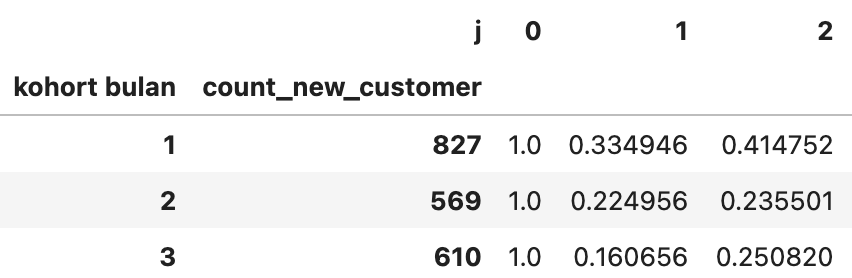

In [27]:
import pandas as pd
from operator import attrgetter

# Ubah kolom 'Date' menjadi tipe datetime
df_kohort = df_sales.copy()
df_kohort['Date'] = pd.to_datetime(df_kohort['Date'])

# Filter data dari 1 Januari 2019 hingga 30 November 2019
df_kohort = df_kohort[(df_kohort['Date'] >= '2019-01-01') & (df_kohort['Date'] <= '2019-11-30')]

# Hitung tanggal transaksi pertama untuk setiap customer
df_first_purchase = df_kohort.groupby('CustomerNo')['Date'].min().reset_index()
df_first_purchase.columns = ['CustomerNo', 'FirstPurchaseDate']

# Gabungkan tanggal transaksi pertama ke df_sales
df_kohort = pd.merge(df_kohort, df_first_purchase, on='CustomerNo')

# Tambahkan kolom untuk bulan dari tanggal transaksi pertama dan tanggal transaksi
df_kohort['CohortMonth'] = df_kohort['FirstPurchaseDate'].dt.to_period('M')
df_kohort['TransactionMonth'] = df_kohort['Date'].dt.to_period('M')

# Hitung kohort pelanggan, berapa banyak customer baru per bulan
cohort_data = df_kohort.groupby(['CohortMonth', 'TransactionMonth']).agg({
    'CustomerNo': pd.Series.nunique
}).reset_index()

# Hitung bulan kohort (perbedaan bulan transaksi dengan bulan pendaftaran)
cohort_data['CohortIndex'] = (cohort_data['TransactionMonth'] - cohort_data['CohortMonth']).apply(attrgetter('n'))

# Pivot data untuk membentuk matriks kohort retensi
cohort_pivot = cohort_data.pivot_table(index='CohortMonth',
                                       columns='CohortIndex',
                                       values='CustomerNo')

# Hitung jumlah pelanggan baru (new customers) per bulan
new_customers = df_kohort.groupby('CohortMonth')['CustomerNo'].nunique()

# Tambahkan kolom pelanggan baru ke pivot tabel
cohort_pivot.insert(0, 'count_new_customers', new_customers)

# Normalisasi untuk menghitung persentase retensi
cohort_size = cohort_pivot['count_new_customers']
retention_matrix = cohort_pivot.iloc[:, 1:].divide(cohort_size, axis=0)

# Gabungkan matriks retensi dan jumlah pelanggan baru
cohort_pivot.iloc[:, 1:] = retention_matrix

# Tampilkan matriks kohort retensi dengan kolom jumlah pelanggan baru
cohort_pivot.fillna(0).style.format("{:.2%}", subset=pd.IndexSlice[:, 1:])


CohortIndex,count_new_customers,0,1,2,3,4,5,6,7,8,9,10
CohortMonth,,,,,,,,,,,,
2019-01,827,1.000000,33.49%,41.48%,37.36%,43.65%,40.63%,37.48%,36.88%,41.23%,40.75%,49.46%
2019-02,569,1.000000,22.50%,23.55%,31.99%,30.05%,25.66%,28.30%,31.28%,29.88%,35.50%,0.00%
2019-03,610,1.000000,16.07%,25.08%,21.97%,24.26%,17.87%,27.54%,24.43%,29.84%,0.00%,0.00%
2019-04,397,1.000000,22.42%,20.65%,21.91%,20.15%,24.69%,24.69%,29.47%,0.00%,0.00%,0.00%
2019-05,374,1.000000,18.45%,17.91%,17.91%,21.39%,22.73%,27.27%,0.00%,0.00%,0.00%,0.00%
2019-06,309,1.000000,18.45%,14.89%,21.36%,21.68%,29.45%,0.00%,0.00%,0.00%,0.00%,0.00%
2019-07,242,1.000000,15.29%,19.01%,21.90%,30.17%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2019-08,192,1.000000,19.79%,23.44%,23.44%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2019-09,312,1.000000,24.68%,33.97%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [29]:
import pandas as pd

df_hor = df_sales.copy()

# Ubah kolom 'Date' menjadi tipe datetime
df_hor['Date'] = pd.to_datetime(df_hor['Date'])

# Filter data dari 1 Januari 2019 hingga 30 November 2019
df_hor = df_hor[(df_hor['Date'] >= '2019-01-01') & (df_hor['Date'] <= '2019-11-30')]

# Hitung tanggal transaksi pertama untuk setiap customer
df_first_purchase = df_hor.groupby('CustomerNo')['Date'].min().reset_index()
df_first_purchase.columns = ['CustomerNo', 'FirstPurchaseDate']

# Gabungkan tanggal transaksi pertama ke df_sales
df_hor = pd.merge(df_hor, df_first_purchase, on='CustomerNo')

# Tambahkan kolom untuk bulan dari tanggal transaksi pertama dan tanggal transaksi
df_hor['CohortMonth'] = df_hor['FirstPurchaseDate'].dt.to_period('M')
df_hor['TransactionMonth'] = df_hor['Date'].dt.to_period('M')

# Hitung kohort pelanggan, berapa banyak customer baru per bulan
cohort_data = df_hor.groupby(['CohortMonth', 'TransactionMonth']).agg({
    'CustomerNo': pd.Series.nunique
}).reset_index()

# Hitung bulan kohort (perbedaan bulan transaksi dengan bulan pendaftaran)
cohort_data['CohortIndex'] = (cohort_data['TransactionMonth'] - cohort_data['CohortMonth']).apply(lambda x: x.n)

# Pivot data untuk membentuk matriks kohort retensi
cohort_pivot = cohort_data.pivot_table(index='CohortMonth',
                                       columns='CohortIndex',
                                       values='CustomerNo')

# Hitung jumlah pelanggan baru (new customers) per bulan
new_customers = df_hor.groupby('CohortMonth')['CustomerNo'].nunique()

# Tambahkan kolom pelanggan baru ke pivot tabel
cohort_pivot.insert(0, 'count_new_customers', new_customers)

# Normalisasi untuk menghitung persentase retensi
cohort_size = cohort_pivot['count_new_customers']
retention_matrix = cohort_pivot.iloc[:, 1:].divide(cohort_size, axis=0)

# Gabungkan matriks retensi dan jumlah pelanggan baru
cohort_pivot.iloc[:, 1:] = retention_matrix

# Tampilkan matriks kohort retensi dengan kolom jumlah pelanggan baru
cohort_pivot.fillna(0).style.format("{:.2%}", subset=pd.IndexSlice[:, 1:])


CohortIndex,count_new_customers,0,1,2,3,4,5,6,7,8,9,10
CohortMonth,,,,,,,,,,,,
2019-01,827,1.000000,33.49%,41.48%,37.36%,43.65%,40.63%,37.48%,36.88%,41.23%,40.75%,49.46%
2019-02,569,1.000000,22.50%,23.55%,31.99%,30.05%,25.66%,28.30%,31.28%,29.88%,35.50%,0.00%
2019-03,610,1.000000,16.07%,25.08%,21.97%,24.26%,17.87%,27.54%,24.43%,29.84%,0.00%,0.00%
2019-04,397,1.000000,22.42%,20.65%,21.91%,20.15%,24.69%,24.69%,29.47%,0.00%,0.00%,0.00%
2019-05,374,1.000000,18.45%,17.91%,17.91%,21.39%,22.73%,27.27%,0.00%,0.00%,0.00%,0.00%
2019-06,309,1.000000,18.45%,14.89%,21.36%,21.68%,29.45%,0.00%,0.00%,0.00%,0.00%,0.00%
2019-07,242,1.000000,15.29%,19.01%,21.90%,30.17%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2019-08,192,1.000000,19.79%,23.44%,23.44%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2019-09,312,1.000000,24.68%,33.97%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


Cara baca :  
Pada bulan januari, ada 827 customer baru.  
33% dari 827 customer melakukan transaksi 1 bulan kemudian.  
41.4% dari 827 customer melakukan transasksi 2 bulan kemduain.  

Hal ini menunjukkan bahwa sekitar sepertiga customer yang melanjutkan transaksi setelah mendaftar pada bulan januari.  

Sedangkan pada kohort bulan februari, ada 569 customer baru dan hanya 22% customer yang kembali bertransaksi sebulan setelahnya  

Buatlah matriks kohort retensi per bulan menggunakan data dari 1 januari 2019 hingga 30 november 2019
Petunjuk : 
1. Hitung tanggal berapa transaksi pertama customer. Disini kita menggunakna asumsi bahwa transaksi pertama pada tahun 2019 adalah transaksi pertama customer.
2. Lakukan iterasi untuk setiap bulan. Ambil berapa banyak customer yang mendaftar dan berapa banyak customer yang sama yang melakukan transaksi di bulan bulan berikutnya.

## Pertanyaan
1. Bagaimana karakteristik pertumbuhan customer baru? Apakah pertumbuhan terus meningkat atau melambat?

2. Setiap bulannya tim marketing menggunakan metode promosi campaign yang berbeda-beda. Bulan mana yang menghasilkan retention paling tinggi?

# Time Series Analysis

Time series analysis adalah analisis untuk melihat trend suatu fenomena berdasarkan waktu.

## Pertanyaan 

Pertanyaan 1 :  
Coba totalkan penjualan setiap barang per hari.   
Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan, atau stagnant.

Pertanyaan 2 :  
Lakukan analisis seasonality dengan melihat total order per harinya dari Senin hingga Minggu.  


# Price Elasticity

Price sensitivity atau sensitifitas harga mengacu pada perubahan permintaan pelanggan akibat naik atau turunya harga suatu produk.

Pada bagian ini anda akan diminta untuk melakukan analisis terhadap suatu produk yang penjualannya sangat dipengaruhi oleh harga.

## Pertanyaan

Pertanyaan 1 :   
Produk apa yang paling sering mengalami perubahan harga?   
Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

Price Elasticity akan semakin baik dianalisis ketika lebih banyak variasi harga yang muncul.

Pertanyaan 2 :   
Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity untuk setiap barang.  
Barang manakah yang memiliki korelasi paling negatif?  

Pertanyaan 3 : 
Buatlah scatter plot antara harga dan quantity untuk barang dari soal sebelumnya.  
Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang akan terjadi dengan penjualan ?

# Basket Size Analysis

Ketika seorang pelanggan e-commerce menekan "add to cart", maka barang tersebut akan disimpan dalam sebuah "basket".  
Ketika melakukan checkout, maka semua barang dalam basket tersebut akan diproses dan dikirimkan.  
Ukuran dari basket dapat diukur melalui nilai GMV (Gross merchandise volume) yang merupakan total harga barang yang dibeli.  
Contoh : 
Pada tanggal 1 januari 2012
Tuan A membeli 1 shampoo seharga 15ribu dan 2 sabun seharga 20ribu masing-masing. Maka basket size tuan A adalah 55ribu rupiah.
Nyonya B hanya membeli 1 cemilan seharga 20 ribu, maka basket size dari nyonya B adalah 20 ribu rupiah.
Berarti total GMV ecommerce pada 1 januari 2012 adalah 75ribu rupiah, dengan rata-rata basket size sebesar 37.5 ribu rupiah per basket.

## Pertanyaan
1. Hitung rata-rata basket size dari seluruh transaksi per harinya, apakah konsisten atau ada perubahan ?
2. Apakah ada perbedaan ukuran basket dari negara yang berbeda ?

# Crucial Question

Ini adalah 5 pertanyaan utama yang ditanyakan oleh pembuat dataset sales ini.  
Anda dapat menggunakan analisis yang sudah dikerjakan pada bagian sebelumnya, ataupun melakukan analisis baru untuk menjawab pertanyaan dibawah.

1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?